<a href="https://colab.research.google.com/github/nisaakan/dsa-project/blob/main/DSA210_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files
uploaded = files.upload()

Saving mental_health_and_technology_usage_2024.csv to mental_health_and_technology_usage_2024.csv


Missing values:
User_ID                     0
Age                         0
Gender                      0
Technology_Usage_Hours      0
Social_Media_Usage_Hours    0
Gaming_Hours                0
Screen_Time_Hours           0
Mental_Health_Status        0
Stress_Level                0
Sleep_Hours                 0
Physical_Activity_Hours     0
Support_Systems_Access      0
Work_Environment_Impact     0
Online_Support_Usage        0
dtype: int64


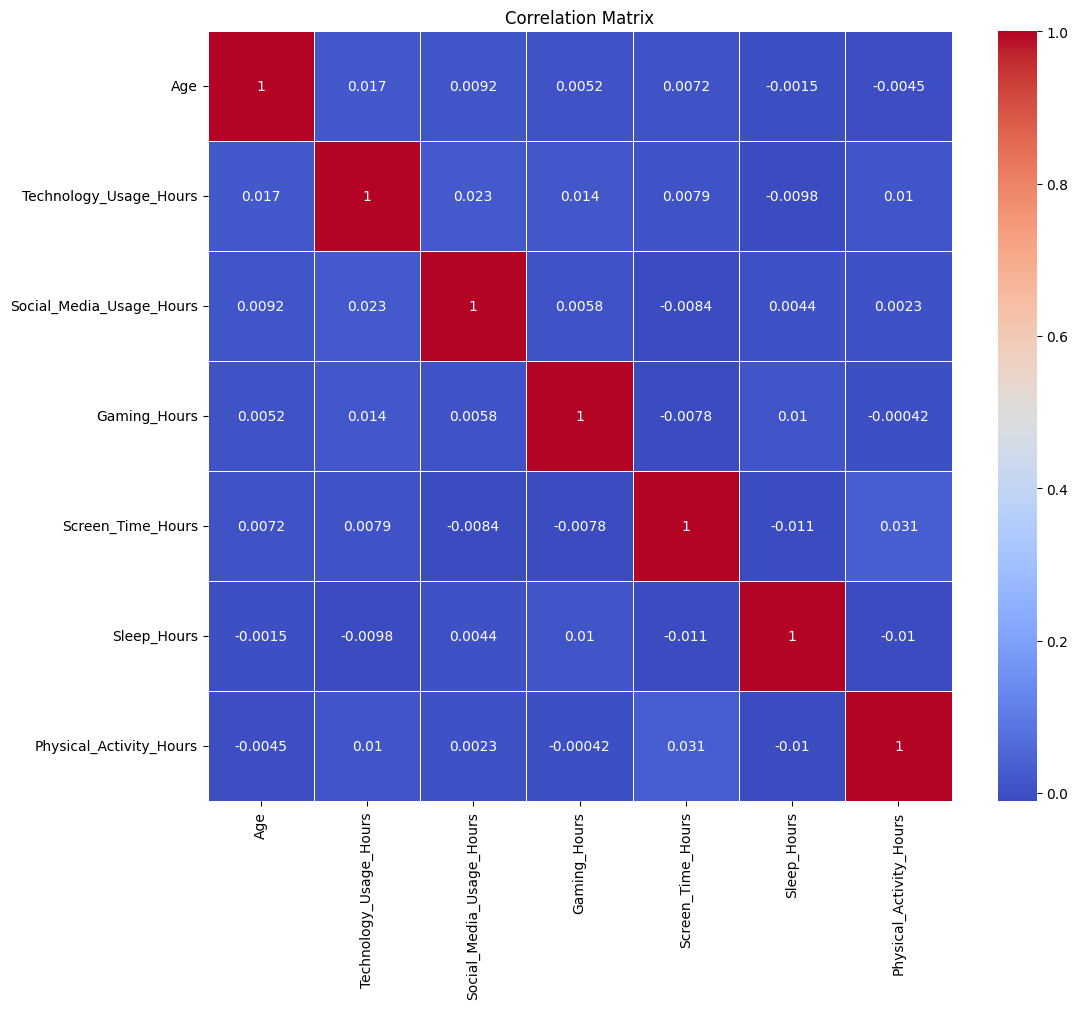

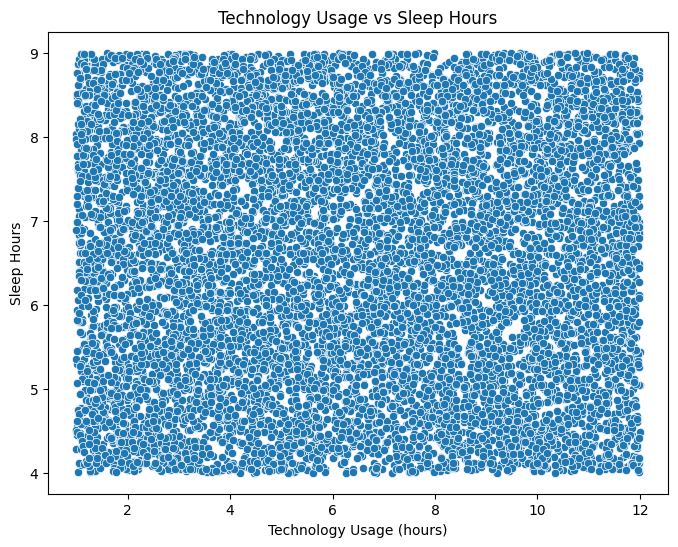

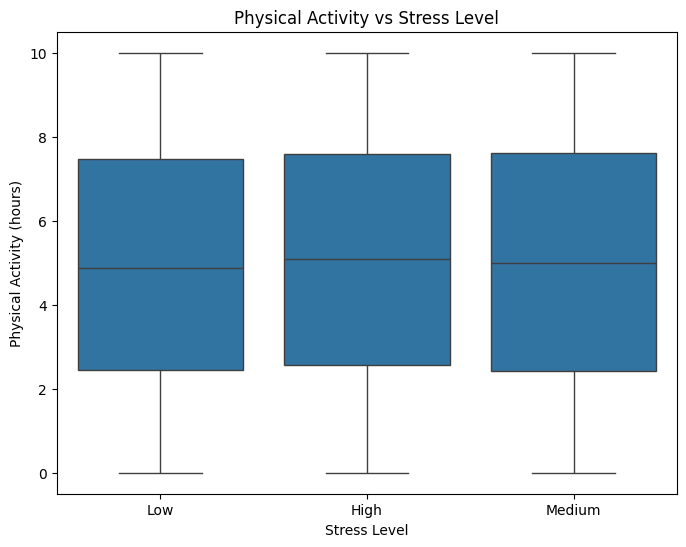

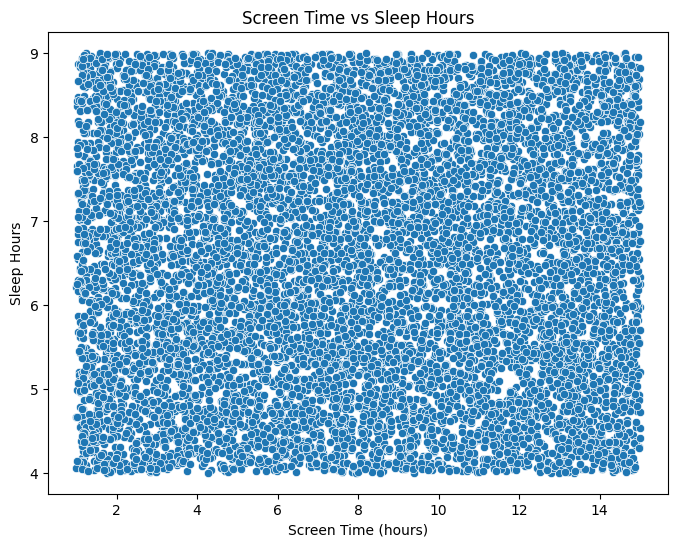

                            OLS Regression Results                            
Dep. Variable:            Sleep_Hours   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.250
Date:                Fri, 25 Apr 2025   Prob (F-statistic):              0.264
Time:                        17:15:06   Log-Likelihood:                -17910.
No. Observations:               10000   AIC:                         3.582e+04
Df Residuals:                    9998   BIC:                         3.584e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.5327      0.03

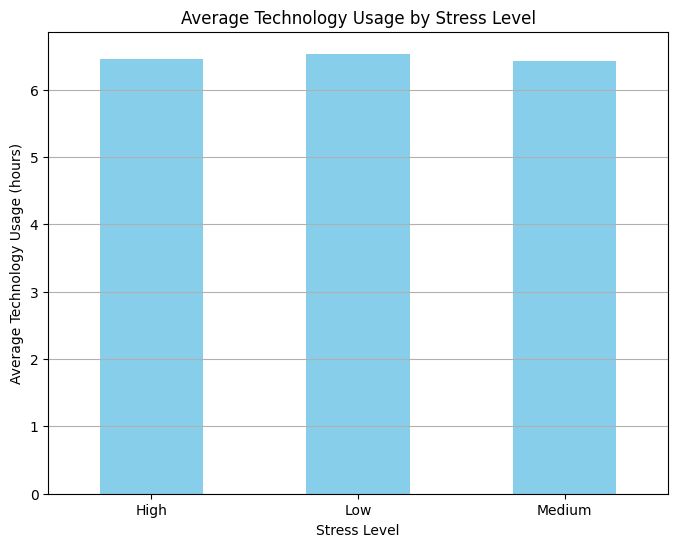

Machine Learning - Mean Squared Error (MSE): 2.11


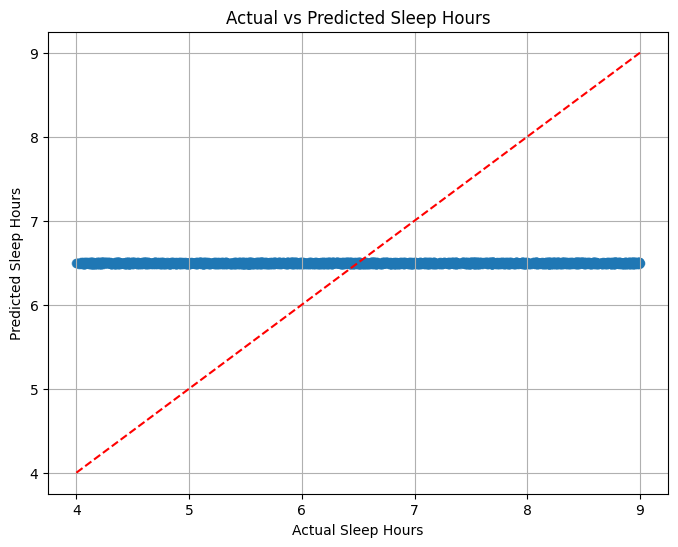

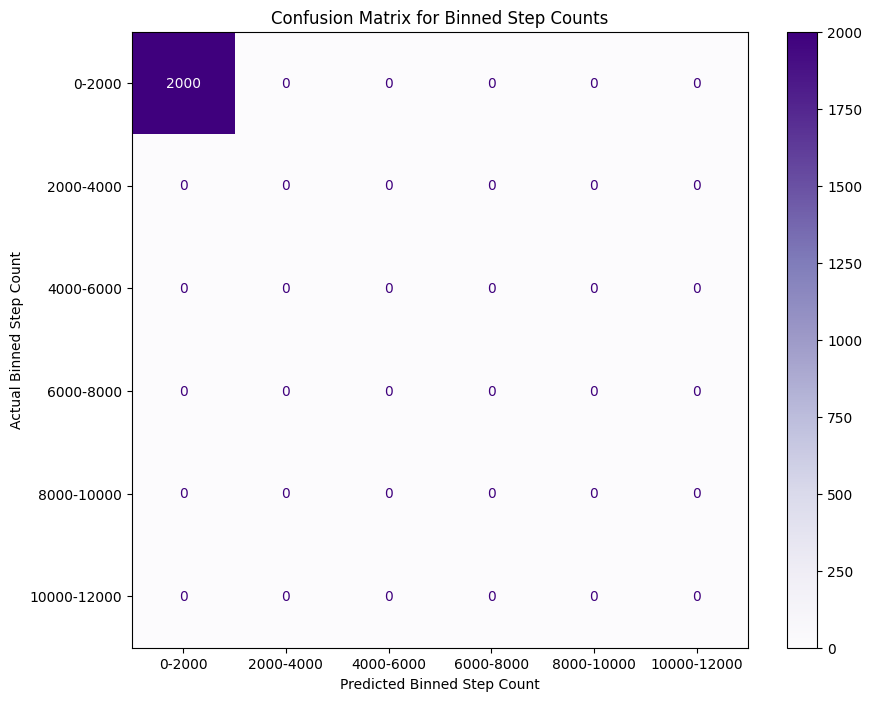

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay


file_path = 'mental_health_and_technology_usage_2024.csv'
data = pd.read_csv(file_path)


print("Missing values:")
print(data.isnull().sum())
data.fillna(data.mean(numeric_only=True), inplace=True)


plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Technology_Usage_Hours', y='Sleep_Hours', data=data)
plt.title('Technology Usage vs Sleep Hours')
plt.xlabel('Technology Usage (hours)')
plt.ylabel('Sleep Hours')
plt.show()


stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
data['Stress_Level_Numeric'] = data['Stress_Level'].map(stress_map)


plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress_Level', y='Physical_Activity_Hours', data=data)
plt.title('Physical Activity vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Physical Activity (hours)')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Screen_Time_Hours', y='Sleep_Hours', data=data)
plt.title('Screen Time vs Sleep Hours')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Sleep Hours')
plt.show()


X = sm.add_constant(data['Screen_Time_Hours'])
y = data['Sleep_Hours']
model = sm.OLS(y, X).fit()
print(model.summary())


corr, p_val = pearsonr(data['Screen_Time_Hours'], data['Sleep_Hours'])
print(f"Correlation: {corr}")
print(f"P-Value: {p_val}")
if p_val < 0.05:
    print("Significant relationship.")
else:
    print("No significant relationship.")


stress_usage = data.groupby('Stress_Level')['Technology_Usage_Hours'].mean()

plt.figure(figsize=(8, 6))
stress_usage.plot(kind='bar', color='skyblue')
plt.title('Average Technology Usage by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Average Technology Usage (hours)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


X_ml = data[['Technology_Usage_Hours']]
y_ml = data['Sleep_Hours']

X_train, X_test, y_train, y_test = train_test_split(X_ml, y_ml, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Machine Learning - Mean Squared Error (MSE): {mse:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sleep Hours")
plt.ylabel("Predicted Sleep Hours")
plt.title("Actual vs Predicted Sleep Hours")
plt.plot([y_ml.min(), y_ml.max()], [y_ml.min(), y_ml.max()], 'r--')
plt.grid(True)
plt.show()




bins = [0, 2000, 4000, 6000, 8000, 10000, 12000]
labels = ['0-2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000', '10000-12000']
y_test_clipped = pd.cut(y_test, bins=bins, labels=labels)
y_pred_clipped = pd.cut(y_pred, bins=bins, labels=labels)


y_test_bins_numeric = pd.Categorical(y_test_clipped).codes
y_pred_bins_numeric = pd.Categorical(y_pred_clipped).codes


conf_mat = confusion_matrix(y_test_bins_numeric, y_pred_bins_numeric, labels=range(len(labels)))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)

plt.figure(figsize=(10, 8))
disp.plot(cmap='Purples', values_format='d', ax=plt.gca())
plt.title("Confusion Matrix for Binned Step Counts")
plt.xlabel("Predicted Binned Step Count")
plt.ylabel("Actual Binned Step Count")
plt.show()
